In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
  
upload = files.upload()

Saving wc_classif.csv to wc_classif.csv


In [3]:
data=pd.read_csv('wc_classif.csv')

In [4]:
data.head()

,Durability %,Hand/Factory Made,MSRP,Box Volume (cm^3),Nature of Payment,No. of Sales,Asia or Not,Port,Factory,Counterfeit
0,0.312381,Handmade,5196,18785.704912,PrePaid,10211,Asia,Port 0,Factory 0,0
1,0.512374,Handmade,5318,17301.908573,PrePaid,5185,Asia,Port 0,Factory 2,1
2,0.752365,Factorymade,6563,9250.611338,COD,5579,Asia,Port 2,Factory 0,1
3,0.592371,Factorymade,5318,12618.315418,COD,6036,Asia,Port 1,Factory 1,0
4,0.712367,Factorymade,3553,9864.706939,COD,6051,Asia,Port 1,Factory 0,1


In [5]:
data.describe()

,Durability %,MSRP,Box Volume (cm^3),No. of Sales,Counterfeit
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,0.511955,5584.445415,14419.252398,6769.544978,0.526638
std,0.179348,1143.406977,3739.167833,1732.488458,0.499399
min,0.052391,2034.000000,5036.032649,1160.000000,0.000000
25%,0.392378,5318.000000,11961.311420,5804.500000,0.000000
50%,0.532373,5318.000000,13932.209634,7031.000000,1.000000
75%,0.632370,6563.000000,16130.172767,7964.000000,1.000000
max,0.992356,6563.000000,29319.972061,10636.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Durability %       2290 non-null   float64
 1   Hand/Factory Made  2290 non-null   object 
 2   MSRP               2290 non-null   int64  
 3   Box Volume (cm^3)  2290 non-null   float64
 4   Nature of Payment  2290 non-null   object 
 5   No. of Sales       2290 non-null   int64  
 6   Asia or Not        2290 non-null   object 
 7   Port               2290 non-null   object 
 8   Factory            2290 non-null   object 
 9   Counterfeit        2290 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 179.0+ KB


In [7]:
data.columns

Index(['Durability %', 'Hand/Factory Made', 'MSRP', 'Box Volume (cm^3)',
       'Nature of Payment', 'No. of Sales', 'Asia or Not', 'Port ', 'Factory ',
       'Counterfeit'],
      dtype='object')

In [8]:
data["Factory "].value_counts()

Factory 0    1310
Factory 1     573
Factory 2     261
Factory 3     146
Name: Factory , dtype: int64

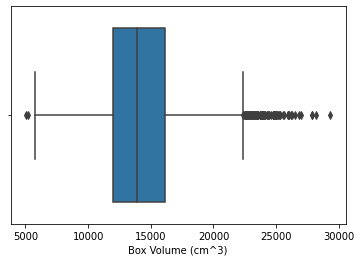

In [9]:
sns.boxplot(x=data["Box Volume (cm^3)"])

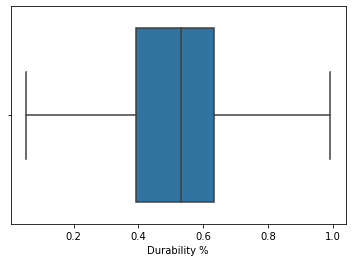

In [10]:
sns.boxplot(x=data["Durability %"])

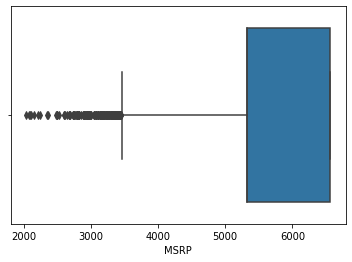

In [11]:
sns.boxplot(x=data["MSRP"])

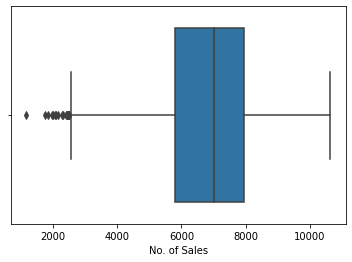

In [12]:
sns.boxplot(x=data["No. of Sales"])

In [13]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["Hand/Factory Made"] = ord_enc.fit_transform(data[["Hand/Factory Made"]])
data.head()

,Durability %,Hand/Factory Made,MSRP,Box Volume (cm^3),Nature of Payment,No. of Sales,Asia or Not,Port,Factory,Counterfeit
0,0.312381,1.0,5196,18785.704912,PrePaid,10211,Asia,Port 0,Factory 0,0
1,0.512374,1.0,5318,17301.908573,PrePaid,5185,Asia,Port 0,Factory 2,1
2,0.752365,0.0,6563,9250.611338,COD,5579,Asia,Port 2,Factory 0,1
3,0.592371,0.0,5318,12618.315418,COD,6036,Asia,Port 1,Factory 1,0
4,0.712367,0.0,3553,9864.706939,COD,6051,Asia,Port 1,Factory 0,1


In [14]:
data["Nature of Payment"] = ord_enc.fit_transform(data[["Nature of Payment"]])
data["Asia or Not"] = ord_enc.fit_transform(data[["Asia or Not"]])
data["Port "] = ord_enc.fit_transform(data[["Port "]])
data["Factory "] = ord_enc.fit_transform(data[["Factory "]])

In [15]:
data.head(500)

,Durability %,Hand/Factory Made,MSRP,Box Volume (cm^3),Nature of Payment,No. of Sales,Asia or Not,Port,Factory,Counterfeit
0,0.312381,1.0,5196,18785.704912,1.0,10211,0.0,0.0,0.0,0
1,0.512374,1.0,5318,17301.908573,1.0,5185,0.0,0.0,2.0,1
2,0.752365,0.0,6563,9250.611338,0.0,5579,0.0,2.0,0.0,1
3,0.592371,0.0,5318,12618.315418,0.0,6036,0.0,1.0,1.0,0
4,0.712367,0.0,3553,9864.706939,0.0,6051,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
495,0.852361,1.0,5318,13878.197527,1.0,5354,0.0,1.0,0.0,0
496,0.592371,0.0,6563,17839.961003,1.0,7033,1.0,0.0,1.0,0
497,0.432377,1.0,5318,15049.756265,1.0,6092,0.0,1.0,1.0,1
498,0.412378,1.0,6563,21458.967751,1.0,7044,1.0,1.0,0.0,1


In [16]:
data["Counterfeit"].value_counts()

1    1206
0    1084
Name: Counterfeit, dtype: int64

In [17]:
X=data.drop(["Counterfeit"],axis=1)
Y=data["Counterfeit"]
X

,Durability %,Hand/Factory Made,MSRP,Box Volume (cm^3),Nature of Payment,No. of Sales,Asia or Not,Port,Factory
0,0.312381,1.0,5196,18785.704912,1.0,10211,0.0,0.0,0.0
1,0.512374,1.0,5318,17301.908573,1.0,5185,0.0,0.0,2.0
2,0.752365,0.0,6563,9250.611338,0.0,5579,0.0,2.0,0.0
3,0.592371,0.0,5318,12618.315418,0.0,6036,0.0,1.0,1.0
4,0.712367,0.0,3553,9864.706939,0.0,6051,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2285,0.392378,0.0,6563,15610.867643,1.0,7036,1.0,1.0,2.0
2286,0.332381,0.0,6563,12893.214922,0.0,6144,1.0,1.0,0.0
2287,0.532373,1.0,6563,11170.647211,0.0,3475,0.0,1.0,0.0
2288,0.312381,0.0,6563,11517.399276,0.0,6620,0.0,0.0,0.0


In [18]:
from sklearn.preprocessing import RobustScaler
Robust= RobustScaler()
X_scaled = Robust.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=["Durability %"	,"Hand/Factory Made"	,"MSRP"	,"Box Volume (cm^3)"	,"Nature of Payment"	,"No. of Sales"	,"Asia or Not"	,"Port"	,"Factory"])
X_scaled.head()


,Durability %,Hand/Factory Made,MSRP,Box Volume (cm^3),Nature of Payment,No. of Sales,Asia or Not,Port,Factory
0,-0.916667,1.0,-0.097992,1.164226,1.0,1.472563,0.0,-1.0,0.0
1,-0.083333,1.0,0.000000,0.808302,1.0,-0.854828,0.0,-1.0,2.0
2,0.916667,0.0,1.000000,-1.122992,0.0,-0.672378,0.0,1.0,0.0
3,0.250000,0.0,0.000000,-0.315169,0.0,-0.460755,0.0,0.0,1.0
4,0.750000,0.0,-1.417671,-0.975687,0.0,-0.453809,0.0,0.0,0.0


In [19]:
X.shape

(2290, 9)

In [20]:
X_train = X_scaled[:2000]
X_test = X_scaled[2000:]
Y_train = Y[:2000]
Y_test = Y[2000:]

In [21]:
X_train

,Durability %,Hand/Factory Made,MSRP,Box Volume (cm^3),Nature of Payment,No. of Sales,Asia or Not,Port,Factory
0,-0.916667,1.0,-0.097992,1.164226,1.0,1.472563,0.0,-1.0,0.0
1,-0.083333,1.0,0.000000,0.808302,1.0,-0.854828,0.0,-1.0,2.0
2,0.916667,0.0,1.000000,-1.122992,0.0,-0.672378,0.0,1.0,0.0
3,0.250000,0.0,0.000000,-0.315169,0.0,-0.460755,0.0,0.0,1.0
4,0.750000,0.0,-1.417671,-0.975687,0.0,-0.453809,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1995,0.333333,0.0,0.000000,-0.077230,0.0,0.563556,1.0,0.0,1.0
1996,-1.416667,0.0,1.000000,0.457423,0.0,1.025237,1.0,-1.0,1.0
1997,-1.833333,1.0,-0.726908,-0.084609,0.0,-1.162769,0.0,-1.0,1.0
1998,-0.416667,0.0,0.000000,0.074726,0.0,-0.092614,0.0,-1.0,3.0


In [22]:
X.shape

(2290, 9)

In [23]:
Y.shape

(2290,)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state = 42, learning_rate = 0.05, max_depth=5)
gbrt.fit(X_train, Y_train)

gbrt.score(X_test, Y_test)


0.7103448275862069

In [25]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(2,21):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,Y_train)
    
    print("Score for k=",k,"is,",KNN.score(X_test,Y_test))
    

Score for k= 2 is, 0.6068965517241379
Score for k= 3 is, 0.7068965517241379
Score for k= 4 is, 0.6586206896551724
Score for k= 5 is, 0.7034482758620689
Score for k= 6 is, 0.6448275862068965
Score for k= 7 is, 0.6482758620689655
Score for k= 8 is, 0.6551724137931034
Score for k= 9 is, 0.6862068965517242
Score for k= 10 is, 0.6862068965517242
Score for k= 11 is, 0.6862068965517242
Score for k= 12 is, 0.7
Score for k= 13 is, 0.7137931034482758
Score for k= 14 is, 0.7
Score for k= 15 is, 0.7103448275862069
Score for k= 16 is, 0.7034482758620689
Score for k= 17 is, 0.7034482758620689
Score for k= 18 is, 0.7103448275862069
Score for k= 19 is, 0.7137931034482758
Score for k= 20 is, 0.7103448275862069


In [26]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=4000)
LR.fit(X_train,Y_train)
print(LR.score(X_test,Y_test))

0.7068965517241379


In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential([
                    Dense(10,activation='relu',input_shape=[9]),
                    Dense(8, activation='relu'),
                    Dense(1, activation='sigmoid'),
])

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=150, batch_size=64, verbose=0)

In [35]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.686
